# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
# pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
# %pip install --upgrade plotly

### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

There are 4324 rows and 9 columns

In [9]:
print(f'The columns names are : {df_data.columns.values}')

The columns names are : ['Unnamed: 0.1' 'Unnamed: 0' 'Organisation' 'Location' 'Date' 'Detail'
 'Rocket_Status' 'Price' 'Mission_Status']


In [10]:
print(f'There are NaN values : {df_data.isna().values.any()}')

There are NaN values : True


In [11]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [12]:
print(f'There are duplicated values : {df_data.duplicated().values.any()}')

There are duplicated values : False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [13]:
df_data.head()

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [12]:
df_data.tail()

Unnamed: 0.1  Unnamed: 0 Organisation  \
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                       Location                        Date  \
4319   LC-18A, Cape Canaveral AFS, Florida, USA  Wed Feb 05, 1958 07:33 UTC   
4320   LC-26A, Cape Canaveral AFS, Florida, USA  Sat Feb 01, 1958 03:48 UTC   
4321   LC-18A, Cape Canaveral AFS, Florida, USA  Fri Dec 06, 1957 16:44 UTC   
4322  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Sun Nov 03, 1957 02:30 UTC   
4323  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Fri Oct 04, 1957 19:28 UTC   

                          Detail  Rocket_Status Price Mission_Status  
4319   Vanguard | Vanguard TV3BU  StatusRetired   NaN        Failure  
4320         Juno I | Explorer 1  StatusRetired   NaN        Success  
4321     Vanguard | Vanguard TV3  StatusRetired   NaN        Failure  
4322  Sputnik 8K71PS | Sputnik-2  StatusRetired   NaN        Success  
4323  Sputnik 8K71PS | Sputnik-1  StatusRetired   NaN        Success

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [14]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis = 1)
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [15]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)

In [16]:
df_data.Date

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [17]:
df_data.Price = df_data.Price.apply(lambda x:str(x).replace(',','')).astype('float64')

In [18]:
df_data.Price

0       50.00
1       29.75
2         NaN
3       65.00
4      145.00
        ...  
4319      NaN
4320      NaN
4321      NaN
4322      NaN
4323      NaN
Name: Price, Length: 4324, dtype: float64

In [19]:
df_data.Price.isna().sum()

3360

## Descriptive Statistics

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [21]:
df_data.describe()

Price
count   964.00
mean    153.79
std     288.45
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [22]:
launches_per_company = df_data.Organisation.value_counts()
launches_per_company

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


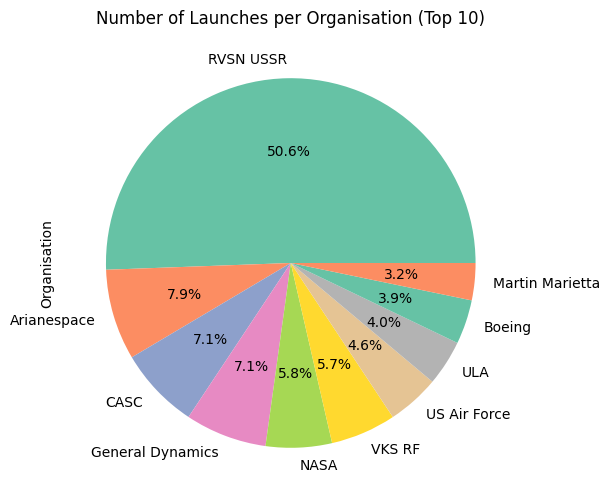

In [23]:
color_palette = sns.color_palette("Set2")
launches_per_company[:10].plot(
    kind='pie', 
    title='Number of Launches per Organisation (Top 10)',  
    figsize=(6,6),
    autopct='%1.1f%%',
    colors=color_palette
)
plt.ylabel('Organisation')  # Set the y-axis label

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [24]:
df_data.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<Axes: title={'center': 'Number of Active vs Decomissioned Rockets'}>

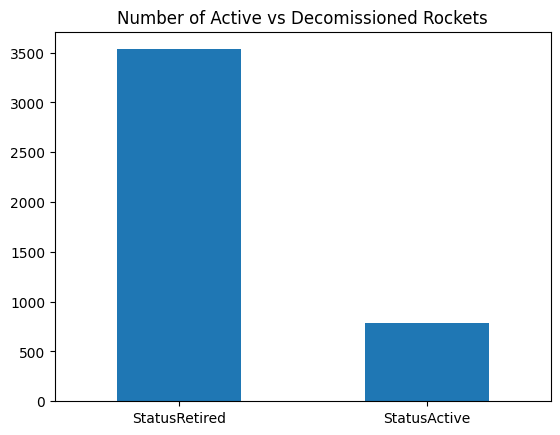

In [25]:
df_data.Rocket_Status.value_counts().plot(
    kind='bar',
    title='Number of Active vs Decomissioned Rockets',
    rot=0,
)

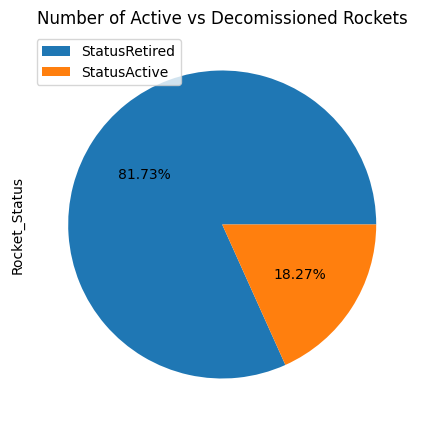

In [26]:
df_data.Rocket_Status.value_counts().plot(
    kind='pie',
    title='Number of Active vs Decomissioned Rockets',
    figsize = (5,5),
    autopct = '%1.2f%%',
    labels = None
)

plt.legend(labels = df_data.Rocket_Status.value_counts().index)
plt.show()

18.27% of the rockets are still active.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [27]:
mission_status_df = df_data.Mission_Status.value_counts()

In [28]:
mission_status_df

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

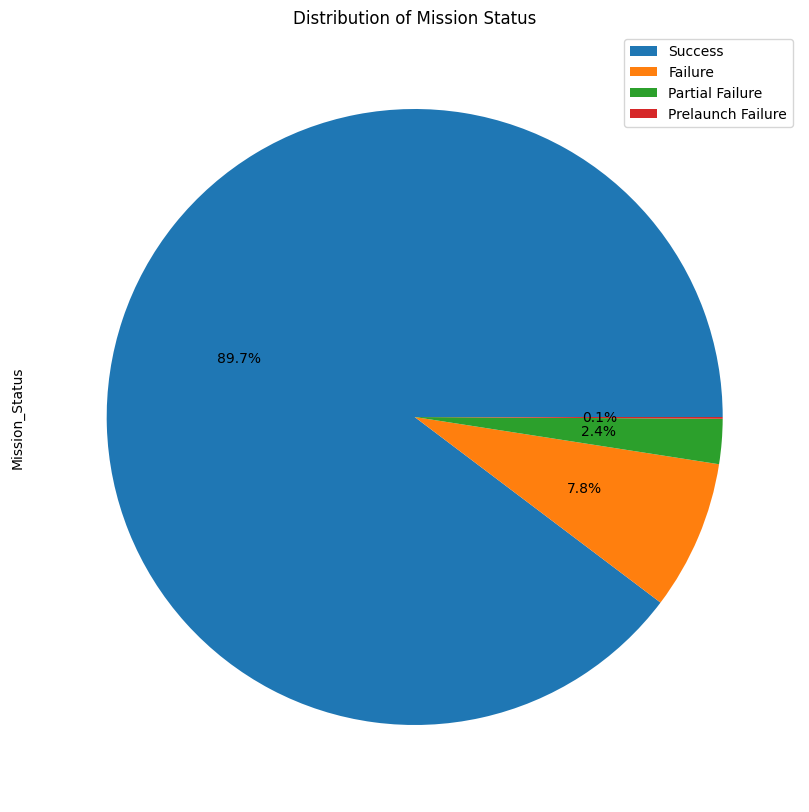

In [29]:
mission_status_df.plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    title = 'Distribution of Mission Status',
    labels=None
)

plt.legend(labels=mission_status_df.index)
plt.show()

89.7% of the missions were succesful while 7.8% failed to launch.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [30]:
cost_distribution = df_data.Price.value_counts()

In [31]:
cost_distribution

450.00      136
200.00       75
40.00        55
62.00        41
30.80        38
109.00       37
50.00        34
64.68        34
29.75        33
90.00        32
41.80        31
48.50        26
29.15        25
31.00        22
29.00        22
59.00        22
69.70        17
21.00        16
65.00        16
35.00        16
56.50        15
37.00        15
164.00       15
7.50         14
1,160.00     13
47.00        13
25.00        12
350.00       11
153.00       11
45.00        10
112.50        9
5.30          9
123.00        8
145.00        7
85.00         7
120.00        7
80.00         7
115.00        6
59.50         5
7.00          5
46.00         5
136.60        4
63.23         4
140.00        3
133.00        3
190.00        3
130.00        3
135.00        2
5,000.00      2
39.00         2
55.00         1
15.00         1
20.14         1
20.00         1
12.00         1
28.30         1
Name: Price, dtype: int64

<Axes: title={'center': "Distribution of the Mission's Expenses (in USD millions)"}, ylabel='Frequency'>

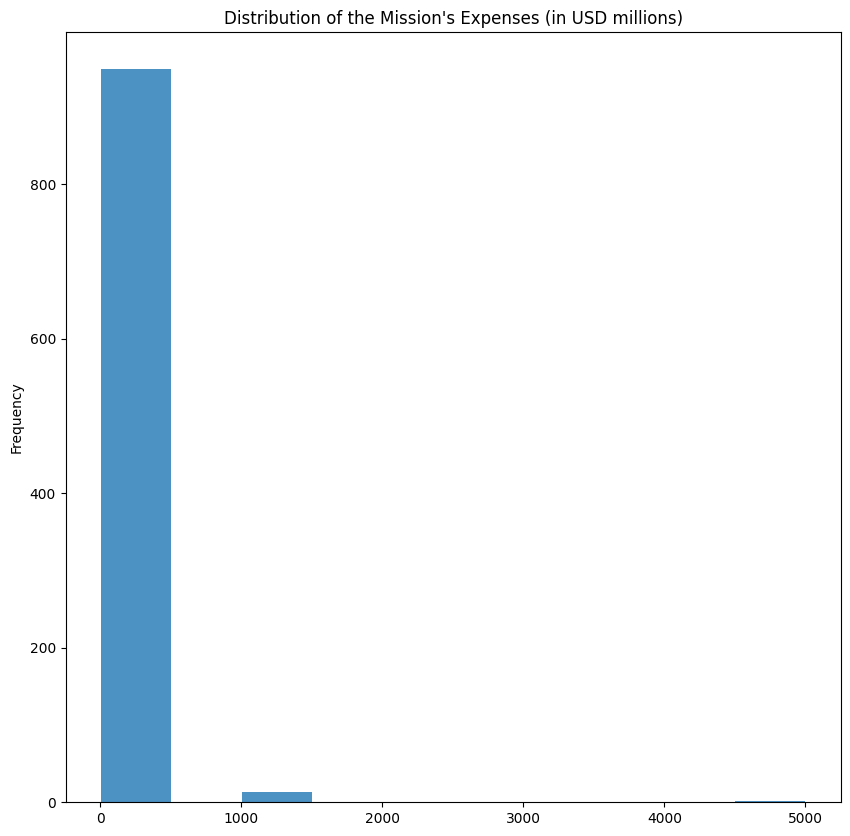

In [32]:
df_data.Price.plot(
    kind='hist',
    title = "Distribution of the Mission's Expenses (in USD millions)",
    figsize = (10,10),
    alpha=0.8
)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [33]:
df_data['Country'] = df_data['Location'].apply(lambda x: x.split(',')[-1].strip())
df_data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [34]:
df_data['Country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    }, 
    inplace=True
)
df_data['Country'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3)
df_data['Country'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [35]:
launches_per_country = df_data['Country'].value_counts()
launches_per_country

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

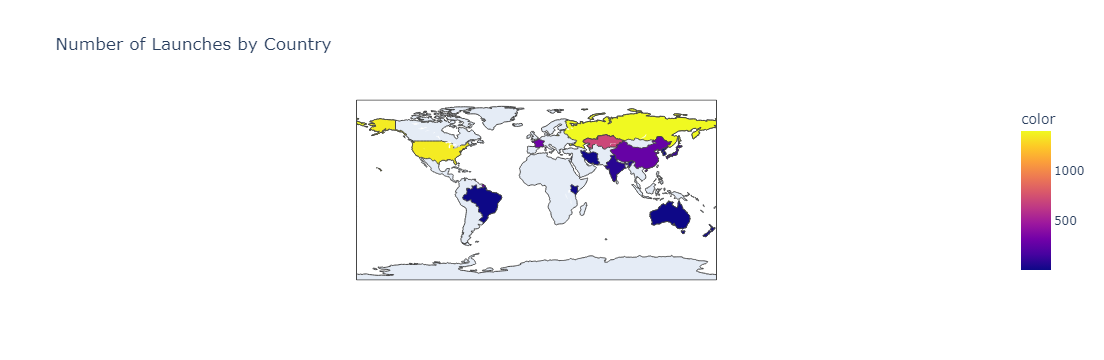

In [36]:
px.choropleth(
    launches_per_country,
    locations=launches_per_country.index,
    color=launches_per_country,
    title = 'Number of Launches by Country'
)

# Use a Choropleth Map to Show the Number of Failures by Country


In [37]:
failures_per_country = df_data[df_data['Mission_Status'] == 'Failure']['Country'].value_counts()
failures_per_country

USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
JPN     10
IRN      8
IND      8
KIR      3
PRK      3
AUS      3
NZL      2
KOR      2
ISR      2
BRA      2
Name: Country, dtype: int64

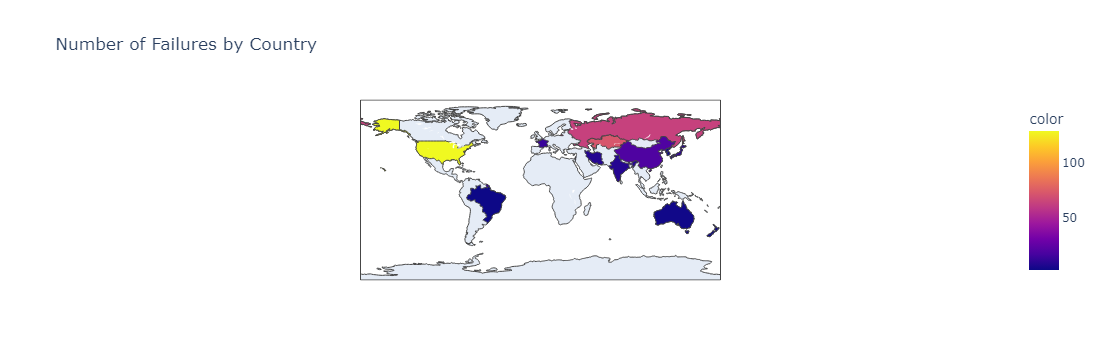

In [38]:
px.choropleth(
    failures_per_country,
    locations=failures_per_country.index,
    color=failures_per_country,
    title = 'Number of Failures by Country'
)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

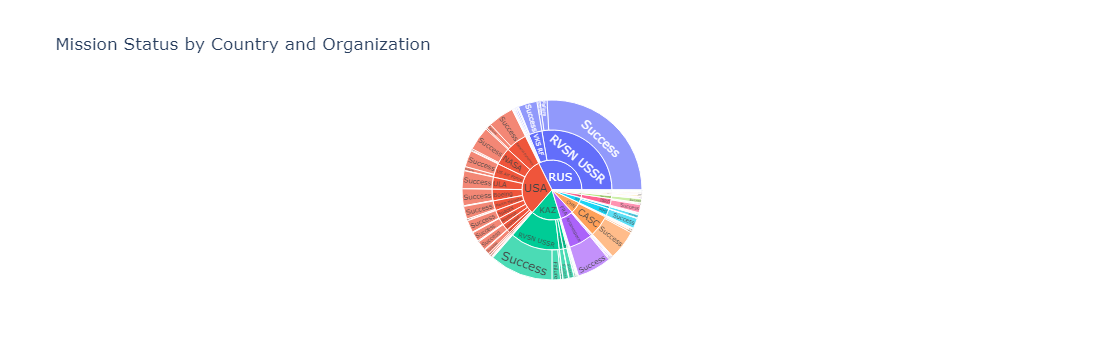

In [39]:
px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country and Organization')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [40]:
money_spent_by_organization = df_data.groupby('Organisation')['Price'].sum()
money_spent_by_organization[money_spent_by_organization!=0]

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

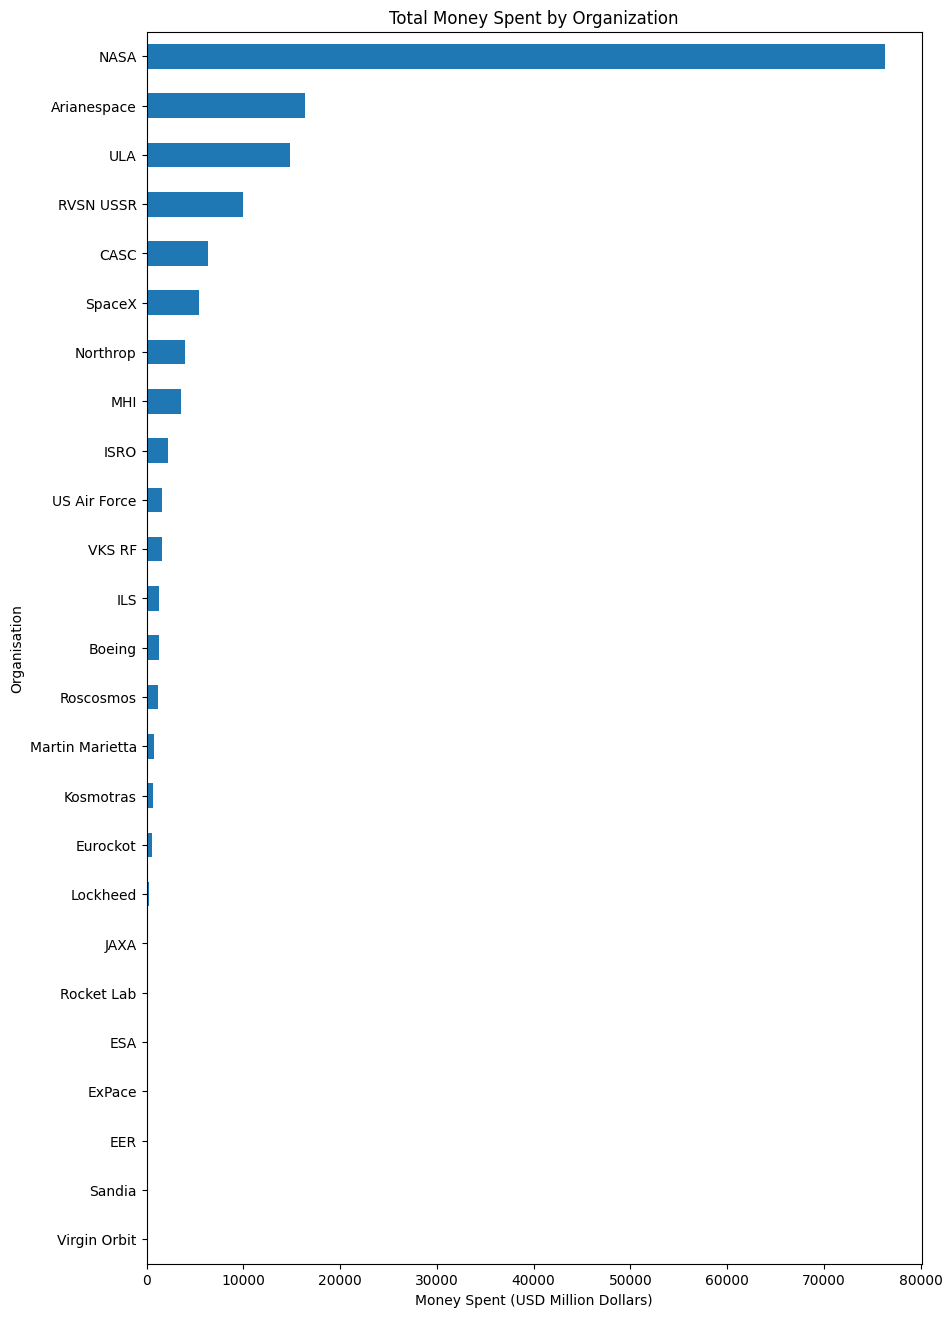

In [41]:
money_spent_by_organization[money_spent_by_organization!=0].sort_values().plot(
    kind='barh',
    title = 'Total Money Spent by Organization',
    figsize=(10,16)
)

plt.xlabel('Money Spent (USD Million Dollars)')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [42]:
avg_money_spent = df_data.groupby('Organisation').agg({'Price':np.mean})
avg_money_spent.dropna()

Price
Organisation            
Arianespace       170.26
Boeing            177.29
CASC               40.13
EER                20.00
ESA                37.00
Eurockot           41.80
ExPace             28.30
ILS               101.54
ISRO               32.49
JAXA               56.00
Kosmotras          29.00
Lockheed           35.00
MHI                95.47
Martin Marietta    80.16
NASA              511.95
Northrop           47.35
RVSN USSR       5,000.00
Rocket Lab          7.50
Roscosmos          51.63
Sandia             15.00
SpaceX             54.99
ULA               151.00
US Air Force       59.65
VKS RF             46.94
Virgin Orbit       12.00

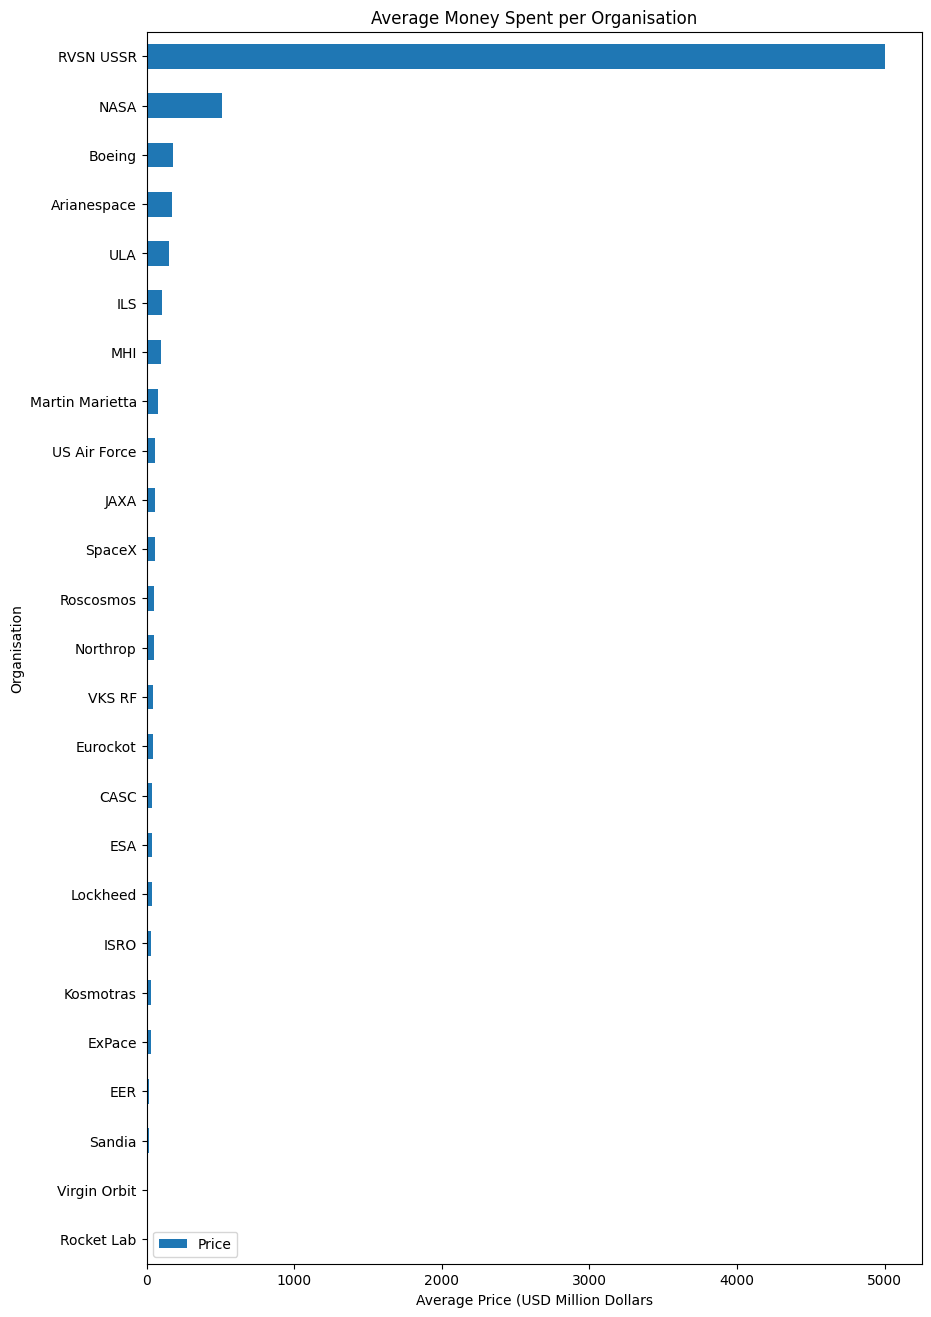

In [43]:
avg_money_spent.dropna().sort_values('Price').plot(
    kind='barh',
    figsize=(10,16),
    title='Average Money Spent per Organisation',
)

plt.xlabel('Average Price (USD Million Dollars')
plt.show()

# Chart the Number of Launches per Year

In [44]:
df_data['Year'] = df_data['Date'].dt.year
launches_per_year = df_data.groupby('Year')['Detail'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

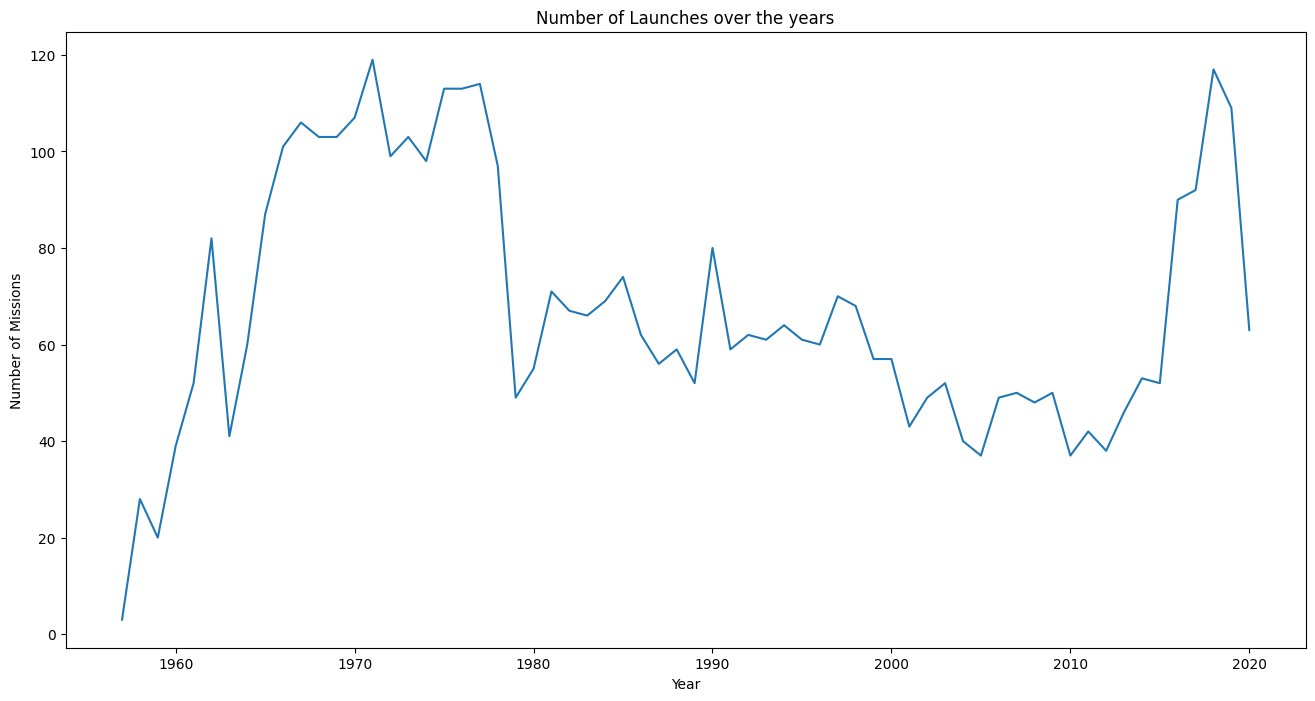

In [45]:
launches_per_year.plot(
    title='Number of Launches over the years',
    figsize = (16,8)
)

plt.ylabel('Number of Missions') 
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [46]:
launches_per_month = df_data.groupby(df_data['Date'].dt.month)['Detail'].count()
launches_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

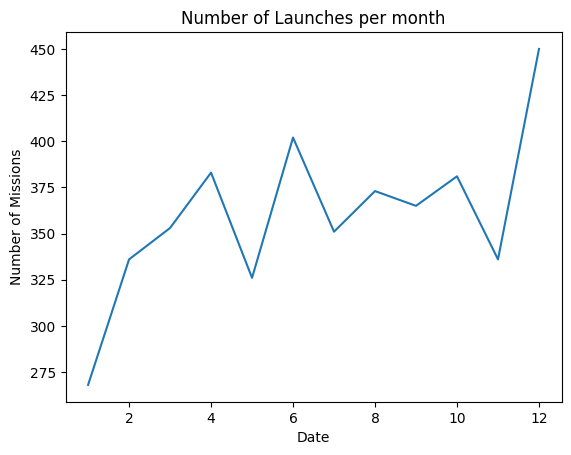

In [47]:
plt.figsize = (16,8)
launches_per_month.plot(title = 'Number of Launches per month')

plt.ylabel('Number of Missions') 
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [48]:
launches_per_month[launches_per_month == launches_per_month.max()]

Date
12    450
Name: Detail, dtype: int64

In [49]:
launches_per_month[launches_per_month == launches_per_month.min()]

Date
1    268
Name: Detail, dtype: int64

It appears that most launches take place in December

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [50]:
price_over_time = df_data.dropna().groupby('Date')['Price'].mean()
price_over_time

Date
1964-09-01 15:00:00+00:00    63.23
1964-12-10 16:52:00+00:00    63.23
1965-02-11 15:19:00+00:00    63.23
1965-05-06 15:00:00+00:00    63.23
1966-07-29 18:43:00+00:00    59.00
                             ...  
2020-07-25 03:13:00+00:00    64.68
2020-07-30 11:50:00+00:00   145.00
2020-07-30 21:25:00+00:00    65.00
2020-08-06 04:01:00+00:00    29.75
2020-08-07 05:12:00+00:00    50.00
Name: Price, Length: 963, dtype: float64

<Axes: title={'center': 'Average Launch Price over Time'}, xlabel='Date'>

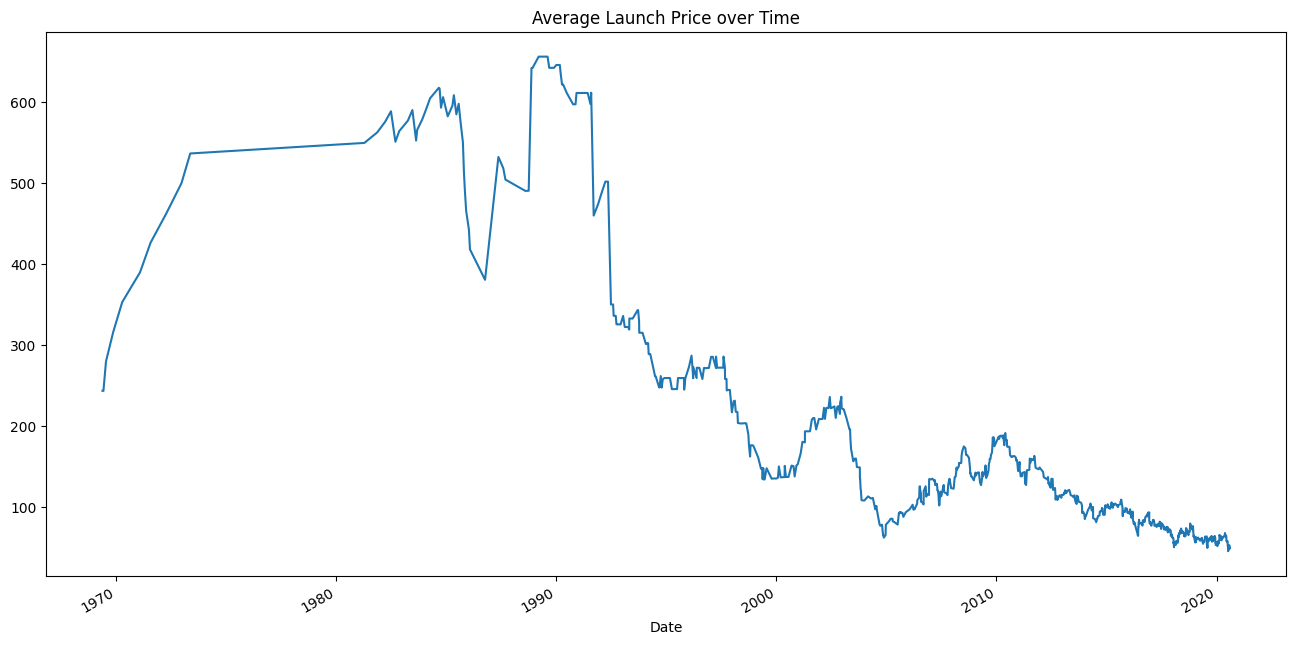

In [51]:
price_over_time.rolling(30).mean().plot(
    figsize = (16,8),
    title = 'Average Launch Price over Time'
)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [52]:
top_10_organisations = df_data['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()
top_10_organisations

['RVSN USSR',
 'Arianespace',
 'CASC',
 'General Dynamics',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [53]:
launches_by_top_10 = df_data[df_data['Organisation'].isin(top_10_organisations)].groupby(['Year','Organisation'])['Detail'].count().unstack(level=1)
launches_by_top_10.fillna(0, inplace=True) 
launches_by_top_10

Organisation  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
Year                                                                         
1957                 0.00    0.00  0.00              0.00             0.00   
1958                 0.00    0.00  0.00              0.00             0.00   
1959                 0.00    0.00  0.00              1.00             0.00   
1960                 0.00    0.00  0.00              5.00             0.00   
1961                 0.00    0.00  0.00              8.00             0.00   
...                   ...     ...   ...               ...              ...   
2016                11.00    0.00 22.00              0.00             0.00   
2017                11.00    0.00 16.00              0.00             0.00   
2018                11.00    0.00 37.00              0.00             0.00   
2019                 9.00    0.00 27.00              0.00             0.00   
2020                 4.00    0.00 19.00              0.00             0.00   

Organisation  NASA  RVSN USSR   ULA  US Air Force  VKS RF  
Year                                                       
1957          0.00       2.00  0.00          0.00    0.00  
1958          2.00       5.00  0.00          2.00    0.00  
1959          1.00       4.00  0.00         10.00    0.00  
1960          4.00       9.00  0.00         21.00    0.00  
1961         12.00       9.00  0.00         23.00    0.00  
...            ...        ...   ...           ...     ...  
2016          0.00       0.00 12.00          0.00    4.00  
2017          0.00       0.00  8.00          0.00    6.00  
2018          0.00       0.00  8.00          0.00    5.00  
2019          0.00       0.00  5.00          0.00    8.00  
2020          0.00       0.00  4.00          0.00    3.00  

[64 rows x 10 columns]

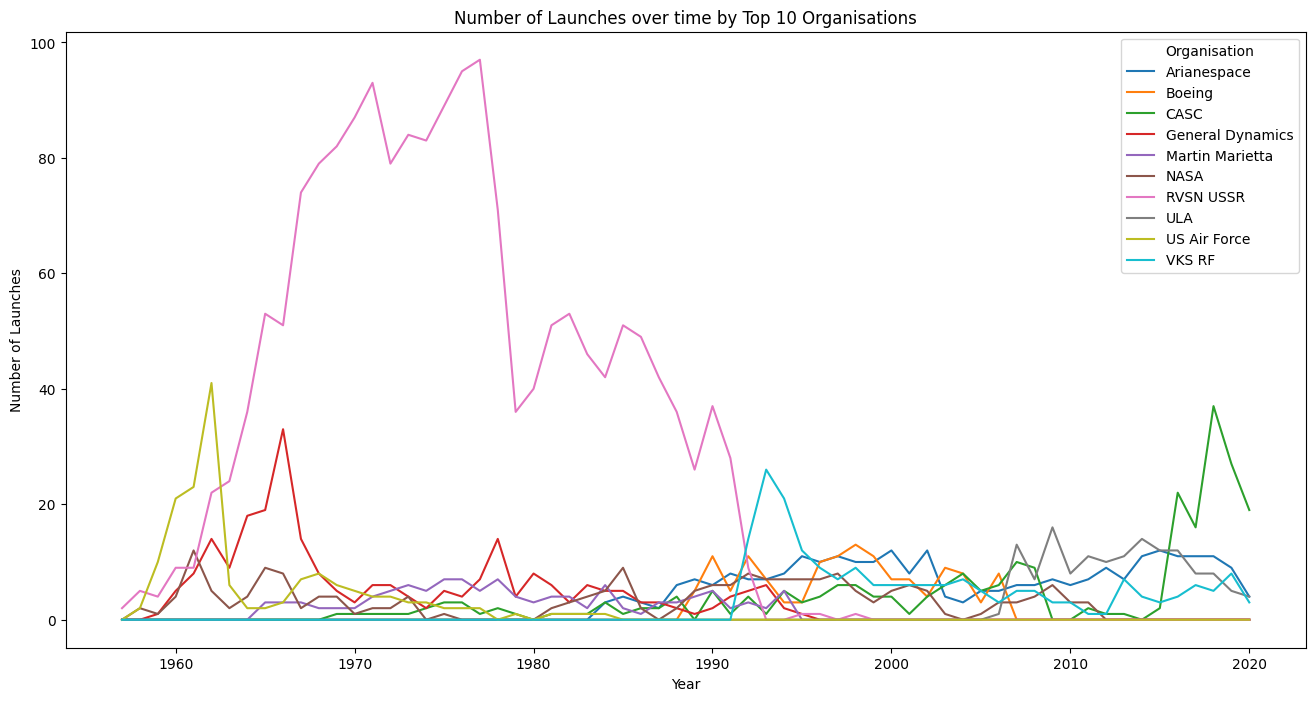

In [54]:
launches_by_top_10.plot(
    figsize=(16,8),
    title = 'Number of Launches over time by Top 10 Organisations',
)

plt.ylabel('Number of Launches')
plt.show()

USAF was realising the most launches up until the beginning of the 60s when RVSN USSR took helm on the race until the beginning of the 90s. That's when the RVSN rapidly lost ground up until they completely stoped launching. After that Arianespace, Boeing and VKS RF seemed to lead the race, up until mid 2010s when CASC surpassed them and has been leading since.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [55]:
cold_war_df = df_data[df_data['Year']<=1991].sort_values('Year').reset_index(drop=True)

In [56]:
cold_war_df.head()

Organisation                                   Location  \
0     RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
1     RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
2       US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
3          AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4  US Air Force    LC-11, Cape Canaveral AFS, Florida, USA   

                       Date                      Detail  Rocket_Status  Price  \
0 1957-10-04 19:28:00+00:00  Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   
1 1957-11-03 02:30:00+00:00  Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
2 1957-12-06 16:44:00+00:00     Vanguard | Vanguard TV3  StatusRetired    NaN   
3 1958-02-01 03:48:00+00:00         Juno I | Explorer 1  StatusRetired    NaN   
4 1958-12-18 23:02:00+00:00        SM-65B Atlas | SCORE  StatusRetired    NaN   

  Mission_Status Country  Year  
0        Success     KAZ  1957  
1        Success     KAZ  1957  
2        Failure     USA  1957  
3        Success     USA  1958  
4        Success     USA  1958

In [57]:
cold_war_df.shape

(2607, 9)

In [58]:
cold_war_df['Country'].duplicated().any()

True

In [59]:
for country in cold_war_df['Country'].drop_duplicates():
  print(countries.get(country))

Country(name='Kazakhstan', alpha2='KZ', alpha3='KAZ', numeric='398', apolitical_name='Kazakhstan')
Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')
Country(name='Russian Federation', alpha2='RU', alpha3='RUS', numeric='643', apolitical_name='Russian Federation')
Country(name='France', alpha2='FR', alpha3='FRA', numeric='250', apolitical_name='France')
Country(name='Japan', alpha2='JP', alpha3='JPN', numeric='392', apolitical_name='Japan')
Country(name='Australia', alpha2='AU', alpha3='AUS', numeric='036', apolitical_name='Australia')
Country(name='Kenya', alpha2='KE', alpha3='KEN', numeric='404', apolitical_name='Kenya')
Country(name='China', alpha2='CN', alpha3='CHN', numeric='156', apolitical_name='China')
Country(name='India', alpha2='IN', alpha3='IND', numeric='356', apolitical_name='India')
Country(name='Israel', alpha2='IL', alpha3='ISR', numeric='376', apolitical_name='Israel')


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [60]:
cold_war_df['Country'].replace(
    {'KAZ':'RUS'},
    inplace=True
)
cold_war_df['Country'].value_counts()

RUS    1770
USA     662
FRA      61
JPN      52
CHN      38
KEN       9
IND       7
AUS       6
ISR       2
Name: Country, dtype: int64

In [61]:
ussr_vs_usa = cold_war_df[cold_war_df['Country'].isin(['RUS','USA'])]
ussr_vs_usa

Organisation                                    Location  \
0        RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
1        RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
2          US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
3             AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4     US Air Force     LC-11, Cape Canaveral AFS, Florida, USA   
...            ...                                         ...   
2601     RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   
2602          NASA  LC-39B, Kennedy Space Center, Florida, USA   
2603     RVSN USSR     Site 133/3, Plesetsk Cosmodrome, Russia   
2604     RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   
2605     RVSN USSR     Site 132/1, Plesetsk Cosmodrome, Russia   

                          Date                               Detail  \
0    1957-10-04 19:28:00+00:00           Sputnik 8K71PS | Sputnik-1   
1    1957-11-03 02:30:00+00:00           Sputnik 8K71PS | Sputnik-2   
2    1957-12-06 16:44:00+00:00              Vanguard | Vanguard TV3   
3    1958-02-01 03:48:00+00:00                  Juno I | Explorer 1   
4    1958-12-18 23:02:00+00:00                 SM-65B Atlas | SCORE   
...                        ...                                  ...   
2601 1991-06-04 09:00:00+00:00                  Tsyklon-3 | Okean 3   
2602 1991-06-05 13:24:00+00:00      Space Shuttle Columbia | STS-40   
2603 1991-06-11 05:42:00+00:00     Cosmos-3M (11K65M) | Cosmos 2150   
2604 1991-06-13 15:41:00+00:00              Tsyklon-3 | Cosmos 2151   
2605 1991-06-25 13:20:00+00:00  Cosmos-3M (11K65M) | Ta??foun n†­59   

      Rocket_Status  Price Mission_Status Country  Year  
0     StatusRetired    NaN        Success     RUS  1957  
1     StatusRetired    NaN        Success     RUS  1957  
2     StatusRetired    NaN        Failure     USA  1957  
3     StatusRetired    NaN        Success     USA  1958  
4     StatusRetired    NaN        Success     USA  1958  
...             ...    ...            ...     ...   ...  
2601  StatusRetired    NaN        Success     RUS  1991  
2602  StatusRetired 450.00        Success     USA  1991  
2603  StatusRetired    NaN        Success     RUS  1991  
2604  StatusRetired    NaN        Success     RUS  1991  
2605  StatusRetired    NaN        Failure     RUS  1991  

[2432 rows x 9 columns]

In [62]:
px.pie(
    title = 'Total Number of Launches (USSR vs USA)',
    values = ussr_vs_usa['Country'].value_counts(),
    names = ussr_vs_usa['Country'].value_counts().index,
)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [63]:
cold_war_launch_by_year = ussr_vs_usa.groupby(['Year','Country'])['Mission_Status'].count().unstack(level=1)
cold_war_launch_by_year

Country  RUS  USA
Year             
1957       2    1
1958       5   23
1959       4   16
1960       9   30
1961       9   43
1962      22   60
1963      24   17
1964      36   24
1965      53   33
1966      51   47
1967      75   26
1968      80   22
1969      83   17
1970      88   11
1971      93   16
1972      79   17
1973      84   17
1974      83   10
1975      89   15
1976      95   13
1977      97   14
1978      71   21
1979      36    9
1980      40   11
1981      51   13
1982      53   11
1983      46   13
1984      42   17
1985      51   16
1986      49    6
1987      42    6
1988      36    7
1989      26   16
1990      37   26
1991      29   18

<Axes: title={'center': 'Total Launches by Year (USSR vs USA)'}, xlabel='Year'>

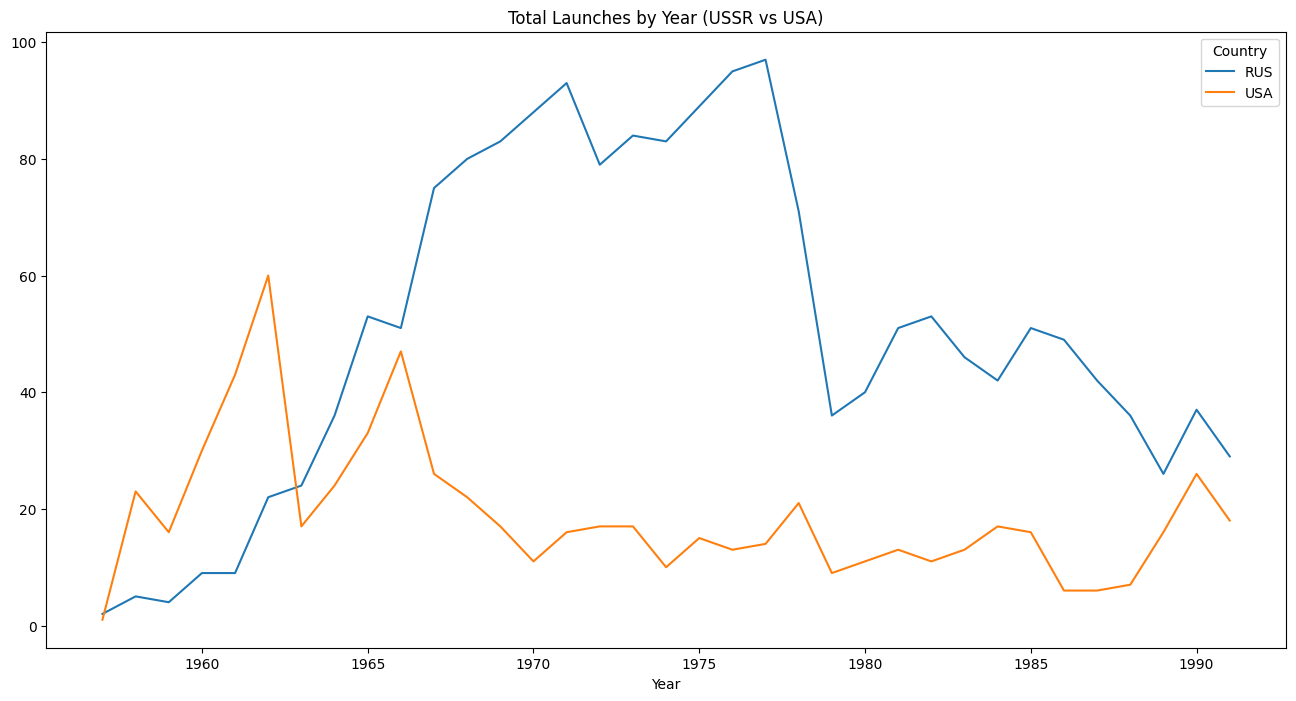

In [64]:
cold_war_launch_by_year.plot(
    figsize = (16,8),
    title = 'Total Launches by Year (USSR vs USA)'
)

## Chart the Total Number of Mission Failures Year on Year.

In [65]:
cold_war_mission_failures_by_year = ussr_vs_usa[ussr_vs_usa['Mission_Status']!='Success'].groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
cold_war_mission_failures_by_year.fillna(0, inplace=True)
cold_war_mission_failures_by_year

Country   RUS   USA
Year               
1957     0.00  1.00
1958     4.00 18.00
1959     2.00 10.00
1960     6.00 14.00
1961     4.00 16.00
1962     7.00 10.00
1963     8.00  4.00
1964     7.00  5.00
1965     6.00  7.00
1966    11.00  7.00
1967    12.00  5.00
1968     8.00  3.00
1969    15.00  0.00
1970     9.00  2.00
1971    10.00  2.00
1972     8.00  2.00
1973     4.00  1.00
1974     5.00  1.00
1975     3.00  3.00
1976     3.00  0.00
1977     3.00  1.00
1978     2.00  1.00
1980     3.00  2.00
1981     3.00  2.00
1982     4.00  0.00
1983     1.00  0.00
1984     1.00  1.00
1985     4.00  1.00
1986     3.00  2.00
1987     1.00  1.00
1988     0.00  1.00
1989     1.00  0.00
1990     2.00  1.00
1991     2.00  2.00

<Axes: title={'center': 'Total Mission Failures by Year (USSR vs USA)'}, xlabel='Year'>

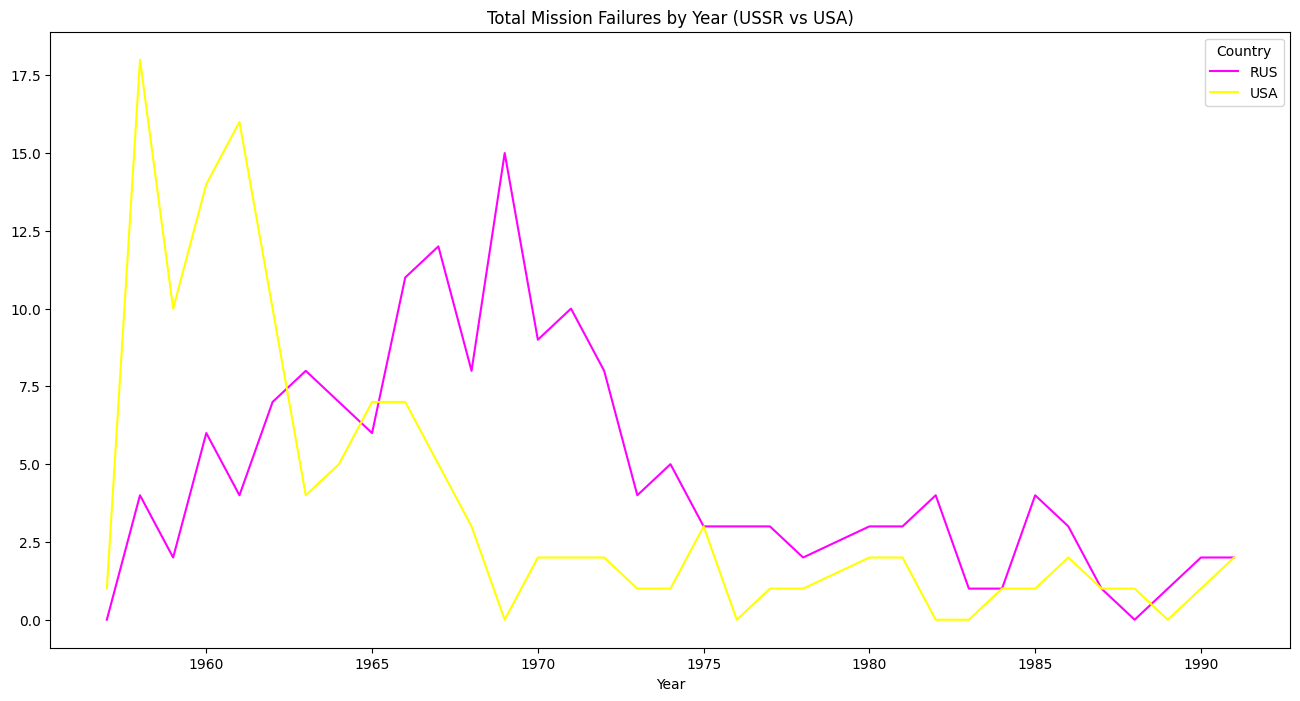

In [66]:
cold_war_mission_failures_by_year.plot(
    figsize = (16,8),
    title = 'Total Mission Failures by Year (USSR vs USA)',
    colormap='spring'
)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [67]:
cold_war_failpct_by_year = cold_war_mission_failures_by_year/cold_war_launch_by_year * 100
cold_war_failpct_by_year.fillna(0, inplace=True)
cold_war_failpct_by_year

Country   RUS    USA
Year                
1957     0.00 100.00
1958    80.00  78.26
1959    50.00  62.50
1960    66.67  46.67
1961    44.44  37.21
1962    31.82  16.67
1963    33.33  23.53
1964    19.44  20.83
1965    11.32  21.21
1966    21.57  14.89
1967    16.00  19.23
1968    10.00  13.64
1969    18.07   0.00
1970    10.23  18.18
1971    10.75  12.50
1972    10.13  11.76
1973     4.76   5.88
1974     6.02  10.00
1975     3.37  20.00
1976     3.16   0.00
1977     3.09   7.14
1978     2.82   4.76
1979     0.00   0.00
1980     7.50  18.18
1981     5.88  15.38
1982     7.55   0.00
1983     2.17   0.00
1984     2.38   5.88
1985     7.84   6.25
1986     6.12  33.33
1987     2.38  16.67
1988     0.00  14.29
1989     3.85   0.00
1990     5.41   3.85
1991     6.90  11.11

<Axes: title={'center': 'Mission Failure Percentage by Year (USSR vs USA)'}, xlabel='Year'>

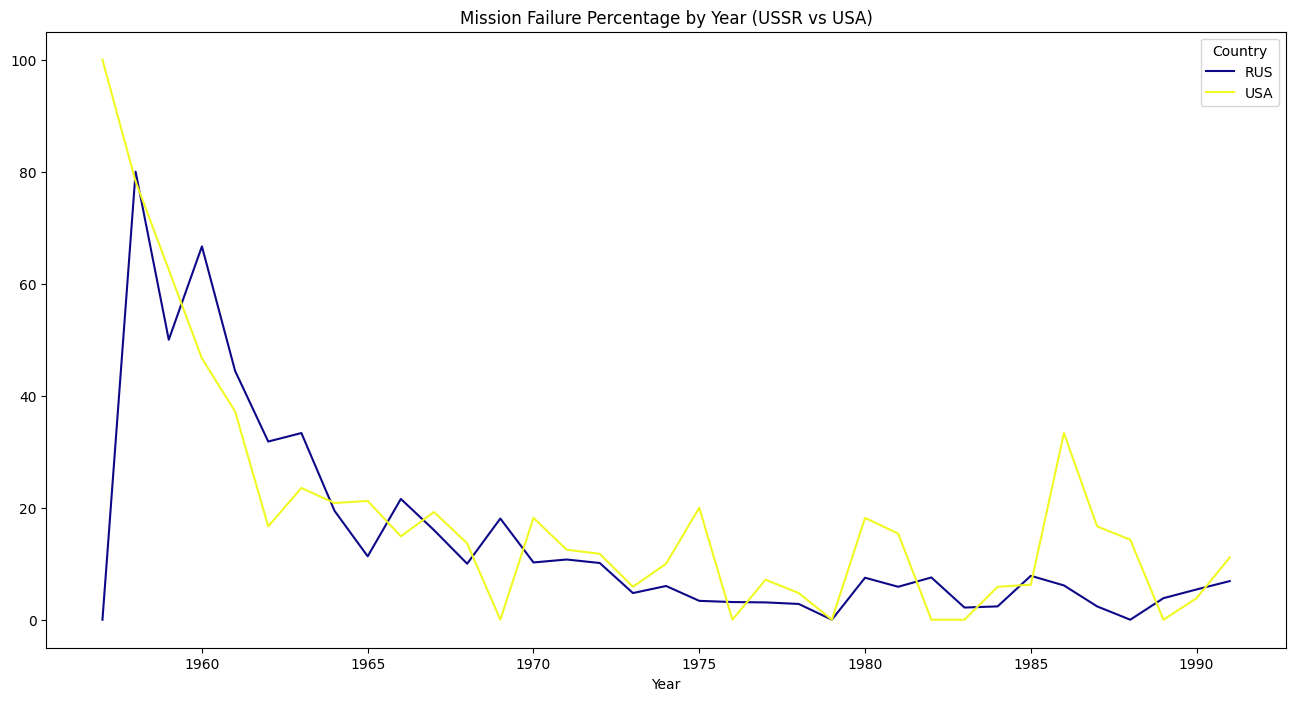

In [68]:
cold_war_failpct_by_year.plot(
    figsize = (16,8),
    title = 'Mission Failure Percentage by Year (USSR vs USA)',
    colormap='plasma'
)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [69]:
launches_by_country_per_year = df_data.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
launches_by_country_per_year.fillna(0, inplace=True)
launches_by_country_per_year

Country  AUS  BRA   CHN   FRA  IND  IRN  ISR  JPN   KAZ  KEN  KIR  KOR  NZL  \
Year                                                                          
1957    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  2.00 0.00 0.00 0.00 0.00   
1958    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  5.00 0.00 0.00 0.00 0.00   
1959    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  4.00 0.00 0.00 0.00 0.00   
1960    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  9.00 0.00 0.00 0.00 0.00   
1961    0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00  7.00 0.00 0.00 0.00 0.00   
...      ...  ...   ...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
2016    0.00 0.00 22.00 11.00 7.00 0.00 1.00 4.00 11.00 0.00 0.00 0.00 0.00   
2017    0.00 0.00 18.00 11.00 5.00 1.00 0.00 7.00 13.00 0.00 0.00 0.00 1.00   
2018    0.00 0.00 39.00 11.00 7.00 0.00 0.00 6.00  9.00 0.00 0.00 0.00 3.00   
2019    0.00 0.00 34.00  9.00 6.00 3.00 0.00 2.00 13.00 0.00 0.00 0.00 6.00   
2020    0.00 0.00 22.00  2.00 0.00 2.00 1.00 3.00  6.00 0.00 0.00 0.00 3.00   

Country  PRK  RUS   USA  
Year                     
1957    0.00 0.00  1.00  
1958    0.00 0.00 23.00  
1959    0.00 0.00 16.00  
1960    0.00 0.00 30.00  
1961    0.00 2.00 43.00  
...      ...  ...   ...  
2016    1.00 6.00 27.00  
2017    0.00 6.00 30.00  
2018    0.00 8.00 34.00  
2019    0.00 9.00 27.00  
2020    0.00 3.00 21.00  

[64 rows x 16 columns]

<Axes: title={'center': 'Number of Launches by Country over the Years'}, xlabel='Year'>

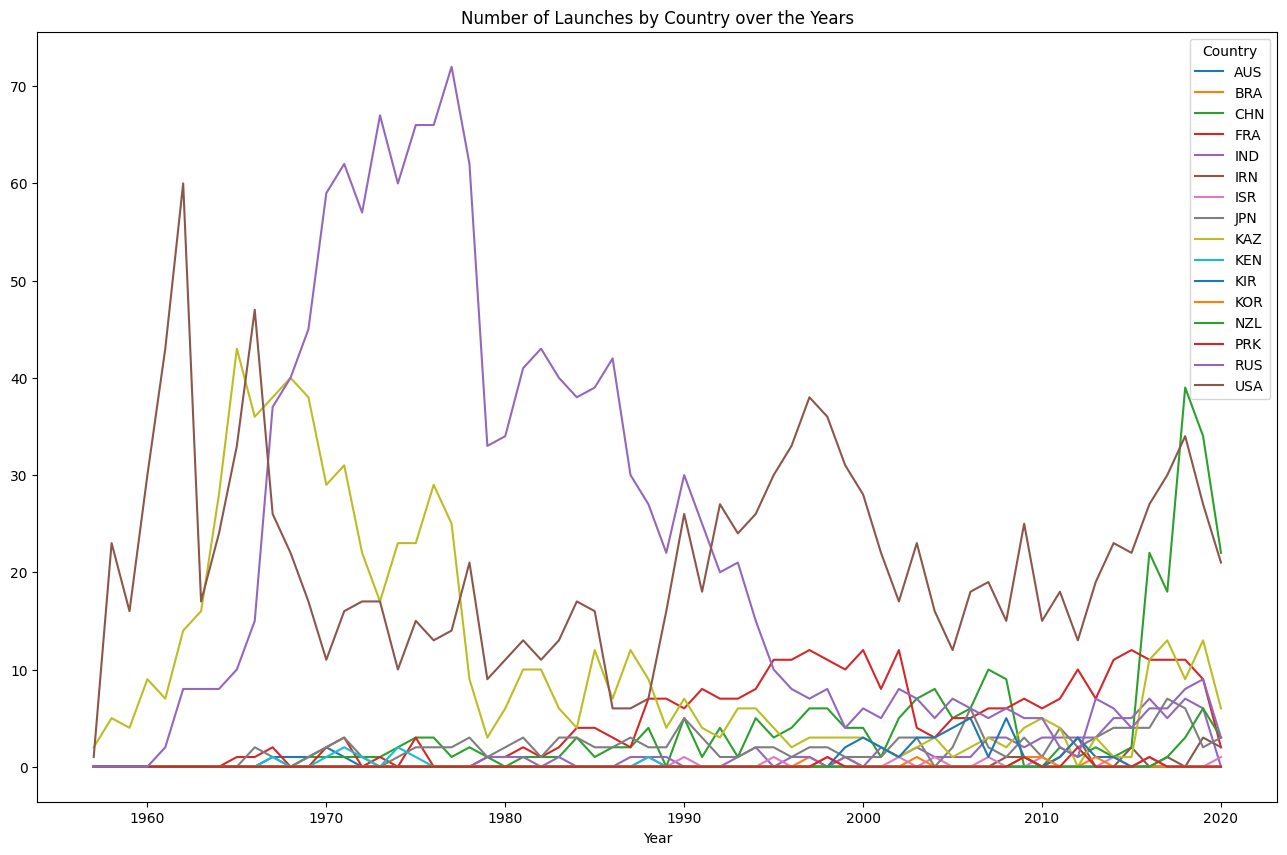

In [70]:
launches_by_country_per_year.plot(
    title = 'Number of Launches by Country over the Years',
    figsize = (16,10),
)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [71]:
launches_by_organisation_per_year = df_data.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
launches_by_organisation_per_year.fillna(0, inplace=True)
launches_by_organisation_per_year

Organisation  AEB  AMBA  ASI  Arianespace  Arm??e de l'Air  Blue Origin  \
Year                                                                      
1957         0.00  0.00 0.00         0.00             0.00         0.00   
1958         0.00  7.00 0.00         0.00             0.00         0.00   
1959         0.00  0.00 0.00         0.00             0.00         0.00   
1960         0.00  0.00 0.00         0.00             0.00         0.00   
1961         0.00  0.00 0.00         0.00             0.00         0.00   
...           ...   ...  ...          ...              ...          ...   
2016         0.00  0.00 0.00        11.00             0.00         4.00   
2017         0.00  0.00 0.00        11.00             0.00         1.00   
2018         0.00  0.00 0.00        11.00             0.00         2.00   
2019         0.00  0.00 0.00         9.00             0.00         3.00   
2020         0.00  0.00 0.00         4.00             0.00         0.00   

Organisation  Boeing  CASC  CASIC  CECLES  ...  SpaceX  Starsem   ULA  \
Year                                       ...                          
1957            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1958            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1959            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1960            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
1961            0.00  0.00   0.00    0.00  ...    0.00     0.00  0.00   
...              ...   ...    ...     ...  ...     ...      ...   ...   
2016            0.00 22.00   0.00    0.00  ...    9.00     0.00 12.00   
2017            0.00 16.00   1.00    0.00  ...   18.00     0.00  8.00   
2018            0.00 37.00   0.00    0.00  ...   21.00     0.00  8.00   
2019            0.00 27.00   0.00    0.00  ...   13.00     0.00  5.00   
2020            0.00 19.00   0.00    0.00  ...   14.00     0.00  4.00   

Organisation  US Air Force  US Navy   UT  VKS RF  Virgin Orbit  Yuzhmash  \
Year                                                                       
1957                  0.00     1.00 0.00    0.00          0.00      0.00   
1958                  2.00    12.00 0.00    0.00          0.00      0.00   
1959                 10.00     4.00 0.00    0.00          0.00      0.00   
1960                 21.00     0.00 0.00    0.00          0.00      0.00   
1961                 23.00     0.00 0.00    0.00          0.00      0.00   
...                    ...      ...  ...     ...           ...       ...   
2016                  0.00     0.00 0.00    4.00          0.00      0.00   
2017                  0.00     0.00 0.00    6.00          0.00      0.00   
2018                  0.00     0.00 0.00    5.00          0.00      0.00   
2019                  0.00     0.00 0.00    8.00          0.00      0.00   
2020                  0.00     0.00 0.00    3.00          1.00      0.00   

Organisation  i-Space  
Year                   
1957             0.00  
1958             0.00  
1959             0.00  
1960             0.00  
1961             0.00  
...               ...  
2016             0.00  
2017             0.00  
2018             0.00  
2019             1.00  
2020             0.00  

[64 rows x 56 columns]

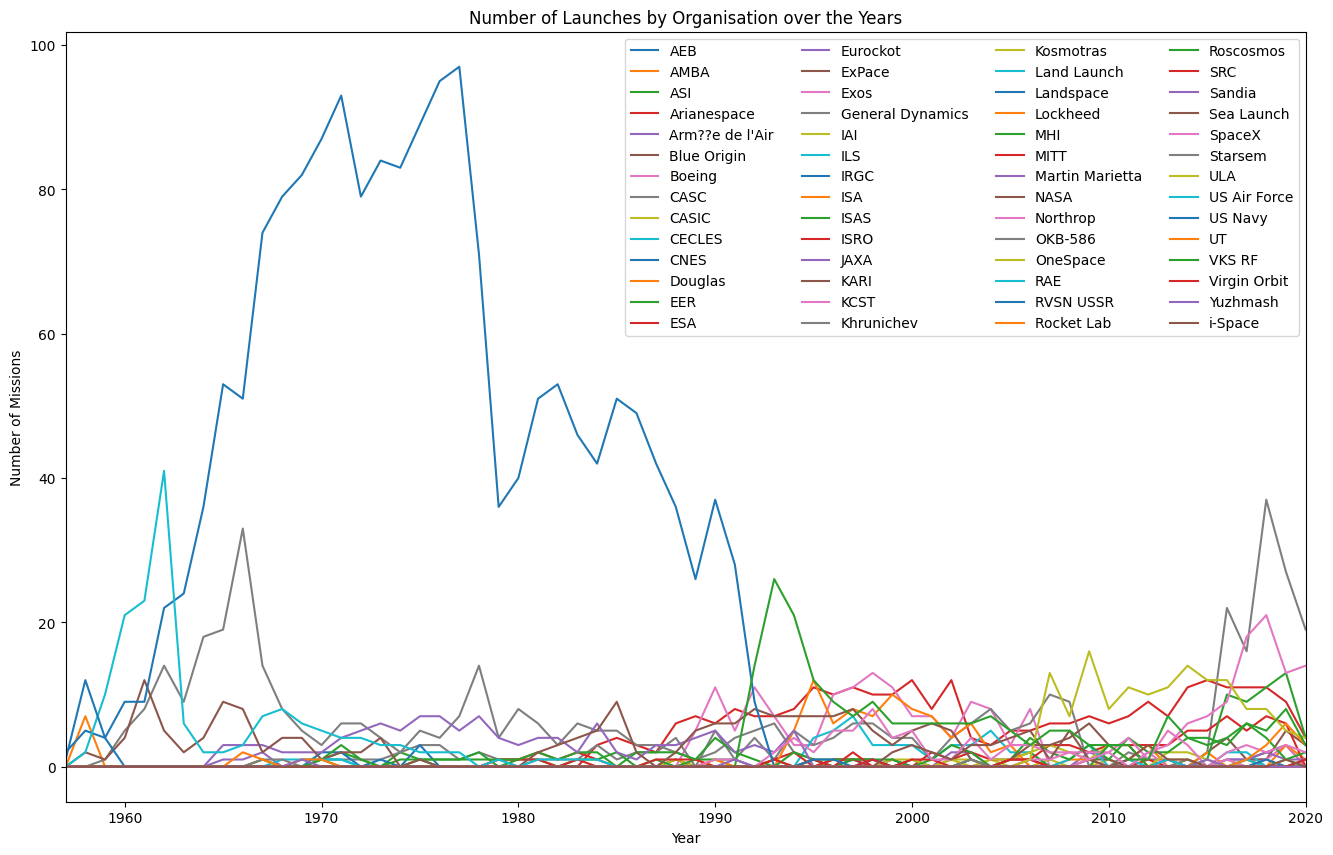

In [72]:
launches_by_organisation_per_year.plot(
    title = 'Number of Launches by Organisation over the Years',
    figsize = (16,10),
)

plt.ylabel('Number of Missions')
plt.xlim(1957, 2020)
plt.legend(loc="upper right", ncol=4)
plt.show()